# References

**Paper:** A new hybrid ensemble feature selection framework for 
machine learning-based phishing detection system (https://doi.org/10.1016/j.ins.2019.01.064)

**Dataset:** https://www.kaggle.com/datasets/shashwatwork/phishing-dataset-for-machine-learning/data

**Codes reference:** 
This notebook is built on top of previous work by MOHAMAD FADIL at https://www.kaggle.com/code/fadilparves/pishing-detection-using-machine-learning

# Predicting Phishing Web Page Using Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (12,6)

Loading the dataset "Phishing_Legitimate_full.csv" (originated from paper "A new hybrid ensemble feature selection framework for 
machine learning-based phishing detection system").

In [2]:
data = pd.read_csv("./Phishing_Legitimate_full.csv")

Convert float64 and int64 data to type 32 for the purpose of saving memory usage later in the training processes.

In [3]:
float_cols = data.select_dtypes('float64').columns
for c in float_cols:
    data[c] = data[c].astype('float32')
    
int_cols = data.select_dtypes('int64').columns
for c in int_cols:
    data[c] = data[c].astype('int32')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int32  
 1   NumDots                             10000 non-null  int32  
 2   SubdomainLevel                      10000 non-null  int32  
 3   PathLevel                           10000 non-null  int32  
 4   UrlLength                           10000 non-null  int32  
 5   NumDash                             10000 non-null  int32  
 6   NumDashInHostname                   10000 non-null  int32  
 7   AtSymbol                            10000 non-null  int32  
 8   TildeSymbol                         10000 non-null  int32  
 9   NumUnderscore                       10000 non-null  int32  
 10  NumPercent                          10000 non-null  int32  
 11  NumQueryComponents                  10000 

In [4]:
data.rename(columns={'CLASS_LABEL': 'labels'}, inplace=True)

View samples of the data.

In [5]:
data.sample(5)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,labels
3832,3833,4,1,9,213,2,0,0,1,0,0,1,0,0,67,1,1,0,0,1,0,18,110,77,0,1,0,0.000000,0.000000,0,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,-1,1,1,1,1,1
1965,1966,2,0,4,51,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,12,32,0,0,1,0,0.000000,0.923077,1,1,0,0,0,1.000000,1,0,0,0,0,0,0,0,1,1,-1,1,-1,-1,1
6000,6001,3,2,3,72,0,0,0,0,5,0,0,0,0,0,1,0,0,0,1,0,18,47,0,0,0,0,0.166667,0.000000,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
8901,8902,2,1,0,46,2,2,0,0,0,0,0,0,0,4,1,1,0,1,0,0,38,1,0,0,0,0,0.172414,0.186047,0,1,1,0,0,0.051724,0,0,0,0,1,0,0,0,1,1,1,1,0,1,0
611,612,6,0,3,106,1,0,0,0,4,0,1,0,0,0,1,1,0,0,1,0,9,54,35,0,0,0,0.000000,0.904762,0,1,1,0,0,0.000000,0,0,0,0,0,0,0,0,1,-1,-1,1,-1,1,1


View summary statistics of the data.

In [6]:
data.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,labels
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,0.458600,0.277200,0.002300,5.810300,0.988800,0.52520,0.017200,0.022200,0.428900,0.0,18.82430,35.564900,8.606500,0.000900,0.109300,0.057100,0.241334,0.392932,0.167200,0.844000,0.248700,0.1018,0.057600,0.136136,0.215300,0.005500,0.014000,0.004900,0.128800,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,1.344793,1.117356,0.047906,9.617877,0.105241,0.49939,0.130023,0.147341,0.494944,0.0,8.11654,24.588502,24.313053,0.029988,0.368737,0.232045,0.342363,0.387295,0.373173,0.362873,0.432281,0.3024,0.232997,0.312426,0.411051,0.073961,0.117496,0.069832,0.334995,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,4.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.0,14.00000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.0,18.00000,30.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.247511,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,1.00000,0.000000,0.000000,1.000000,0.0,22.00000,48.000000,0.000000,0.000000,0.000000,0.000000,0.315874,0.785714,0.000000,1.000000,0.000000,0.0000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000

The dataset is balanced, with 5000 data of phishing websites and 5000 non-phishing website.

<Axes: xlabel='labels'>

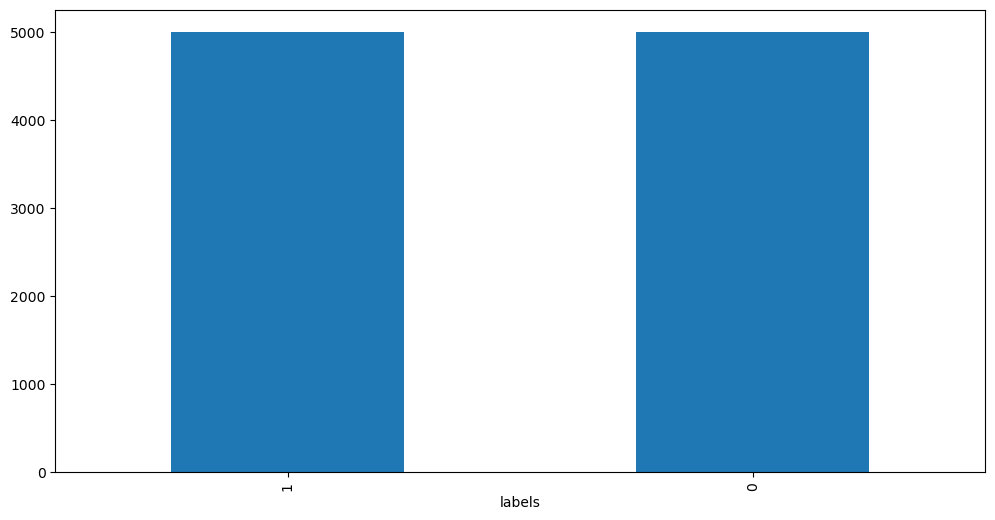

In [7]:
data['labels'].value_counts().plot(kind='bar')

# Training Random Forest Classifier

We train a Random Forest Classifier using only URL features.

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Define the feature names
feature_list = [
    "NumDots",
    "SubdomainLevel",
    "PathLevel",
    "UrlLength",
    "NumDash",
    "NumDashInHostname",
    "AtSymbol",
    "TildeSymbol",
    "NumUnderscore",
    "NumPercent",
    "NumQueryComponents",
    "NumAmpersand",
    "NumHash",
    "NumNumericChars",
    "NoHttps",
    "RandomString",
    "IpAddress",
    "DomainInSubdomains",
    "DomainInPaths",
    "HttpsInHostname",
    "HostnameLength",
    "PathLength",
    "QueryLength",
    "DoubleSlashInPath",
    "NumSensitiveWords",
    "EmbeddedBrandName",
    "PctExtHyperlinks",
    "PctExtResourceUrls",
    "ExtFavicon",
    "InsecureForms",
    "RelativeFormAction",
    "ExtFormAction",
    "AbnormalFormAction",
    "PctNullSelfRedirectHyperlinks",
    "FrequentDomainNameMismatch",
    "FakeLinkInStatusBar",
    "RightClickDisabled",
    "PopUpWindow",
    "SubmitInfoToEmail",
    "IframeOrFrame",
    "MissingTitle",
    "ImagesOnlyInForm",
    "SubdomainLevelRT",
    "UrlLengthRT",
    "PctExtResourceUrlsRT",
    "AbnormalExtFormActionR",
    "ExtMetaScriptLinkRT",
    "PctExtNullSelfRedirectHyperlinksRT"
]


# Assuming 'data' is already defined and loaded with the required data
X = data[feature_list]
y = data['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

rfc = RandomForestClassifier(n_estimators=1000)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Performance for RFC Model is precision: {precision}, recall: {recall}, f1 score: {f1}, accuracy: {accuracy}")


Performance for RFC Model is precision: 0.9824742268041237, recall: 0.9824742268041237, f1 score: 0.9824742268041237, accuracy: 0.983


In [9]:
import joblib

joblib.dump(rfc, 'random_forest_model.pkl')

print("Random Forest model saved successfully to 'random_forest_model.pkl'")

Random Forest model saved successfully to 'random_forest_model.pkl'


# Performance of the Random Forest Classifier

In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1030
           1       0.98      0.98      0.98       970

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



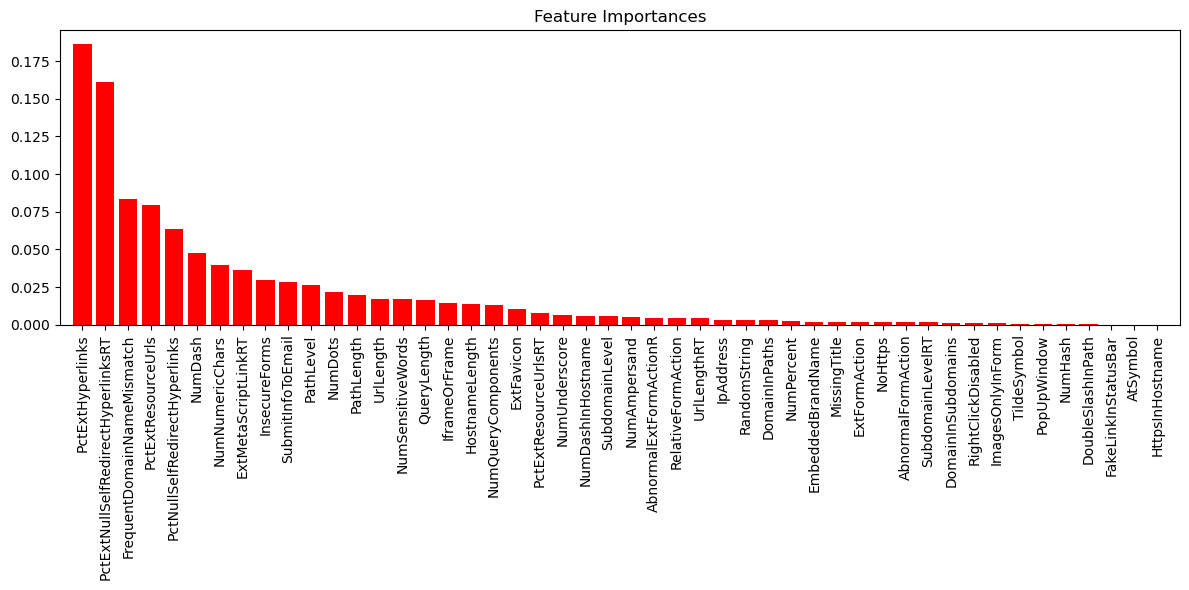

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# After training your RandomForestClassifier
feature_importances = rfc.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Plotting the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), np.array(feature_list)[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()


# Testing the Random Forest Classifier Model with an unseen URL

Create a function that will extract the features from a given url.

In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
from urllib.parse import urlparse
import tldextract
from collections import Counter

# Define a list of sensitive words to count in the URL
sensitive_words = ['secure', 'account', 'webscr', 'login', 'ebayisapi', 'signin', 'banking', 'confirm']

# Define function to extract domain names from text
def extract_domain_names(text):
    domain_pattern = r'[\w-]+\.[\w.-]+'
    return re.findall(domain_pattern, text)


# Function to compute features from a URL, including HTML content analysis
def compute_features(url, feature_list):
    parsed_url = urlparse(url)
    hostname = parsed_url.hostname if parsed_url.hostname else ""
    path = parsed_url.path.lower() if parsed_url.path else ""
    query = parsed_url.query if parsed_url.query else ""
    ext = tldextract.extract(url)
    base_url = f"{parsed_url.scheme}://{parsed_url.netloc}"

    # Extract components using tldextract
    extracted = tldextract.extract(url)
    subdomain = extracted.subdomain
    domain = extracted.domain
    suffix = extracted.suffix

    # Calculate subdomain level
    # Count the dots in the subdomain and add 1 for each subdomain part
    subdomain_parts = subdomain.split('.') if subdomain else []
    subdomain_level = len(subdomain_parts) if subdomain else 0

    # Check domain presence in subdomain
    domain_in_subdomains = 1 if extracted.subdomain and extracted.domain and extracted.domain in extracted.subdomain else 0

    # Check domain presence in path
    domain_in_paths = 1 if extracted.domain and extracted.domain in path else 0
    
    # Attempt to fetch the webpage content
    try:
        response = requests.get(url, timeout=10)
        html_content = response.text
        soup = BeautifulSoup(html_content, 'html.parser')
    except requests.RequestException:
        html_content = ""
        soup = None

    # Count sensitive words in the URL
    num_sensitive_words = sum(word in url.lower() for word in sensitive_words)

    # Initialize feature dictionary
    features = {
        "NumDots": url.count('.'),
        "SubdomainLevel": subdomain_level,
        "PathLevel": path.count('/') - 1 if path else 0,
        "UrlLength": len(url),
        "NumDash": url.count('-'),
        "NumDashInHostname": hostname.count('-') if hostname else 0,
        "AtSymbol": 1 if '@' in url else 0,
        "TildeSymbol": 1 if '~' in url else 0,
        "NumUnderscore": url.count('_'),
        "NumPercent": url.count('%'),
        "NumQueryComponents": query.count('='),
        "NumAmpersand": url.count('&'),
        "NumHash": url.count('#'),
        "NumNumericChars": sum(c.isdigit() for c in url),
        "NoHttps": 0 if 'https' in url[:8] else 1,
        "RandomString": 1 if re.search(r'[\W_]+', url) else 0,
        "IpAddress": 1 if re.match(r'^\d+\.\d+\.\d+\.\d+$', hostname) else 0,
        "DomainInSubdomains": domain_in_subdomains,
        "DomainInPaths": domain_in_paths,
        "HttpsInHostname": 1 if 'https' in hostname else 0,
        "HostnameLength": len(hostname),
        "PathLength": len(path),
        "QueryLength": len(query),
        "DoubleSlashInPath": 1 if '//' in path[1:] else 0,
        "NumSensitiveWords": sum(word in url.lower() for word in sensitive_words),
        "EmbeddedBrandName": 0,
        "PctExtHyperlinks": 0,
        "PctExtResourceUrls": 0,
        "ExtFavicon": 0,
        "InsecureForms": 0,
        "RelativeFormAction": 0,
        "ExtFormAction": 0,
        "AbnormalFormAction": 0,
        "PctNullSelfRedirectHyperlinks": 0,
        "FrequentDomainNameMismatch": 0,
        "FakeLinkInStatusBar": 0,
        "RightClickDisabled": 0,
        "PopUpWindow": 0,
        "SubmitInfoToEmail": 0,
        "IframeOrFrame": 0,
        "MissingTitle": 0,
        "ImagesOnlyInForm": 0,
        "SubdomainLevelRT": hostname.count('.'),
        "UrlLengthRT": len(url),
        "PctExtResourceUrlsRT": 0,
        "AbnormalExtFormActionR": 0,
        "ExtMetaScriptLinkRT": 0,
        "PctExtNullSelfRedirectHyperlinksRT": 0
    }

    if soup:
        # Analyze external hyperlinks
        links = soup.find_all('a', href=True)
        total_links = len(links)
        null_or_self_links = 0
        external_links = 0

        for link in links:
            href = link['href']
            if href.startswith('#') or href == '' or href.startswith('javascript'):
                null_or_self_links += 1
            elif urlparse(href).netloc and urlparse(href).netloc != hostname:
                external_links += 1

        features["PctExtHyperlinks"] = (external_links / total_links) * 100 if total_links else 0
        features["PctNullSelfRedirectHyperlinks"] = (null_or_self_links / total_links) * 100 if total_links else 0

        # Analyze external resource URLs
        resources = soup.find_all(['script', 'link', 'img'], src=True)
        total_resources = len(resources)
        external_resources = sum(1 for res in resources if urlparse(res['src']).netloc and urlparse(res['src']).netloc != hostname)
        features["PctExtResourceUrls"] = (external_resources / total_resources) * 100 if total_resources > 0 else 0

        # analysis for the "EmbeddedBrandName"
        text = soup.get_text().lower()
        domain_names = extract_domain_names(text)
        if domain_names:
            # Count frequencies of each domain found in text
            domain_count = Counter(domain_names)
            most_common_domain, _ = domain_count.most_common(1)[0]
            subdomain = ext.subdomain.lower()

            # Check if most common domain is in subdomain or path
            if most_common_domain in subdomain or most_common_domain in path.lower():
                features["EmbeddedBrandName"] = 1

            # Get the domain of the URL
            url_domain = tldextract.extract(url).domain

            # Check if the most frequent domain in the text is different from the URL's domain
            if most_common_domain != url_domain:
                features["FrequentDomainNameMismatch"] = 1            
        
        # Check if favicon is loaded from a different domain
        favicon = soup.find('link', rel='shortcut icon')
        if favicon and urlparse(favicon['href']).netloc and urlparse(favicon['href']).netloc != hostname:
            features["ExtFavicon"] = 1

        # Check for insecure forms
        forms = soup.find_all('form', action=True)
        features["InsecureForms"] = sum(1 for form in forms if form['action'].startswith('http:') or not urlparse(form['action']).scheme)

        # Form Analysis
        for form in forms:
            action = form['action']
            action_url = urlparse(action)
            if not action_url.scheme:  # Relative URL
                features["RelativeFormAction"] = 1
            elif action_url.netloc and action_url.netloc != hostname:
                features["ExtFormAction"] = 1
            if action in ['#', 'about:blank', '', 'javascript:true']:
                features["AbnormalFormAction"] = 1
            if action.startswith('mailto:'):
                features["SubmitInfoToEmail"] = 1
            if form['action'].startswith('http:'):
                features["InsecureForms"] = 1

        # Embedded Scripts Analysis
        scripts = soup.find_all('script')
        for script in scripts:
            if 'onmouseover' in str(script):
                features["FakeLinkInStatusBar"] = 1
            if 'oncontextmenu' in str(script):
                features["RightClickDisabled"] = 1
            if 'window.open' in str(script):
                features["PopUpWindow"] = 1

        # Frame and Iframe Analysis
        if soup.find_all(['iframe', 'frame']):
            features["IframeOrFrame"] = 1

        # Title check
        title = soup.find('title')
        if not title or not title.get_text(strip=True):
            features["MissingTitle"] = 1

        # Images only in forms
        forms = soup.find_all('form')
        for form in forms:
            # Using `strings` to get all strings within the form, recursively if needed
            texts = form.find_all(string=True, recursive=False)
            images = form.find_all('img')
            # Checking if there is any non-empty string in the texts
            if images and not any(text.strip() for text in texts):
                features["ImagesOnlyInForm"] = 1
                break

        # External resource URLs
        resources = soup.find_all(['script', 'link', 'img'], src=True)
        external_resources = sum(1 for res in resources if urlparse(res['src']).netloc and urlparse(res['src']).netloc != hostname)
        total_resources = len(resources)
        if total_resources > 0:
            features["PctExtResourceUrlsRT"] = (external_resources / total_resources) * 100
        
        # External meta, script, link tags
        meta_script_links = soup.find_all(['meta', 'script', 'link'], src=True)
        external_meta_script_links = sum(1 for tag in meta_script_links if 'src' in tag.attrs and urlparse(tag['src']).netloc and urlparse(tag['src']).netloc != hostname)
        total_meta_script_links = len(meta_script_links)
        if total_meta_script_links > 0:
            features["ExtMetaScriptLinkRT"] = (external_meta_script_links / total_meta_script_links) * 100

        # Abnormal form actions
        for form in forms:
            action = form.get('action', '')
            if urlparse(action).netloc and urlparse(action).netloc != hostname or action in ['about:blank', '']:
                features["AbnormalExtFormActionR"] = 1
                break

        # Hyperlinks analysis for null/self-redirect/JavaScript void
        links = soup.find_all('a', href=True)
        null_self_js_links = sum(1 for link in links if link['href'].startswith('#') or link['href'].startswith('javascript:void(0)') or not link['href'])
        total_links = len(links)
        if total_links > 0:
            features["PctExtNullSelfRedirectHyperlinksRT"] = (null_self_js_links / total_links) * 100

    # Return only the features used by the model
    print(features)
    return {key: features[key] for key in feature_list}

In [13]:
import joblib

# Load the model properly
rf_model = joblib.load('random_forest_model.pkl')
    
def rf_predict_url_class(url, model, feature_list):
    # Compute only the needed features
    features = compute_features(url, feature_list)
    features_df = pd.DataFrame([features])
    
    # Predict using the trained model
    prediction = model.predict(features_df)
    return prediction[0]

In [14]:
url = "http://www.citi.com/xxxxxxxxxxxx.dddddd/ddddddd"
predicted_class = rf_predict_url_class(url, rf_model, feature_list)
print("Predicted class:", "bad" if predicted_class == 1 else "good")

{'NumDots': 3, 'SubdomainLevel': 1, 'PathLevel': 1, 'UrlLength': 47, 'NumDash': 0, 'NumDashInHostname': 0, 'AtSymbol': 0, 'TildeSymbol': 0, 'NumUnderscore': 0, 'NumPercent': 0, 'NumQueryComponents': 0, 'NumAmpersand': 0, 'NumHash': 0, 'NumNumericChars': 0, 'NoHttps': 1, 'RandomString': 1, 'IpAddress': 0, 'DomainInSubdomains': 0, 'DomainInPaths': 0, 'HttpsInHostname': 0, 'HostnameLength': 12, 'PathLength': 28, 'QueryLength': 0, 'DoubleSlashInPath': 0, 'NumSensitiveWords': 0, 'EmbeddedBrandName': 0, 'PctExtHyperlinks': 0.0, 'PctExtResourceUrls': 0.0, 'ExtFavicon': 0, 'InsecureForms': 0, 'RelativeFormAction': 0, 'ExtFormAction': 0, 'AbnormalFormAction': 0, 'PctNullSelfRedirectHyperlinks': 0.0, 'FrequentDomainNameMismatch': 1, 'FakeLinkInStatusBar': 0, 'RightClickDisabled': 0, 'PopUpWindow': 0, 'SubmitInfoToEmail': 0, 'IframeOrFrame': 0, 'MissingTitle': 1, 'ImagesOnlyInForm': 0, 'SubdomainLevelRT': 2, 'UrlLengthRT': 47, 'PctExtResourceUrlsRT': 0.0, 'AbnormalExtFormActionR': 0, 'ExtMetaScri

# Training Neural Network Classifier

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

feature_list = [
    "NumDots",
    "SubdomainLevel",
    "PathLevel",
    "UrlLength",
    "NumDash",
    "NumDashInHostname",
    "AtSymbol",
    "TildeSymbol",
    "NumUnderscore",
    "NumPercent",
    "NumQueryComponents",
    "NumAmpersand",
    "NumHash",
    "NumNumericChars",
    "NoHttps",
    "RandomString",
    "IpAddress",
    "DomainInSubdomains",
    "DomainInPaths",
    "HttpsInHostname",
    "HostnameLength",
    "PathLength",
    "QueryLength",
    "DoubleSlashInPath",
    "NumSensitiveWords",
    "EmbeddedBrandName",
    "PctExtHyperlinks",
    "PctExtResourceUrls",
    "ExtFavicon",
    "InsecureForms",
    "RelativeFormAction",
    "ExtFormAction",
    "AbnormalFormAction",
    "PctNullSelfRedirectHyperlinks",
    "FrequentDomainNameMismatch",
    "FakeLinkInStatusBar",
    "RightClickDisabled",
    "PopUpWindow",
    "SubmitInfoToEmail",
    "IframeOrFrame",
    "MissingTitle",
    "ImagesOnlyInForm",
    "SubdomainLevelRT",
    "UrlLengthRT",
    "PctExtResourceUrlsRT",
    "AbnormalExtFormActionR",
    "ExtMetaScriptLinkRT",
    "PctExtNullSelfRedirectHyperlinksRT"
]


Using device: cuda


In [16]:
X = data[feature_list]
y = data['labels']

X = X.to_numpy()
y = y.to_numpy()

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors and ensure correct data types
X_train, y_train = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long)
X_val, y_val = torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.long)
X_test, y_test = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long)

# Data loaders
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [17]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        return out

#### Testing different learning rates

In [18]:
# Number of features in X_train
input_size = X_train.shape[1]
num_classes = 2 
hidden_size = 200

# Track validation losses and learning rates
val_losses = []
learning_rates = []

# Test different learning rates
for i in range(100):
    lr = 10**np.random.uniform(-5, -1)
    model = NeuralNet(input_size, hidden_size, num_classes).to(device)  # Re-initialize model for each LR and move to device
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    # Train for 5 epochs
    print(f"[Test {i}] Testing learning rate: {lr}")
    for epoch in range(3):
        model.train()
        total_train_loss = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Ensure data is on the GPU
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()

        avg_train_loss = total_train_loss / len(train_loader)
        
        # Evaluate on validation set
        model.eval()
        total_val_loss = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)  # Ensure data is on the GPU
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                total_val_loss += loss.item()

        avg_val_loss = total_val_loss / len(val_loader)
        print(f"Epoch {epoch + 1}: Train Loss = {avg_train_loss:.4f}, Validation Loss = {avg_val_loss:.4f}")
    
    val_losses.append(avg_val_loss)
    learning_rates.append(lr)

# Identify the learning rate with the lowest validation loss
min_loss_index = val_losses.index(min(val_losses))
best_lr = learning_rates[min_loss_index]
print(f"Best learning rate: {best_lr} with validation loss: {val_losses[min_loss_index]} (Test {min_loss_index})")

[Test 0] Testing learning rate: 0.01359635829061361
Epoch 1: Train Loss = 0.1946, Validation Loss = 0.1486
Epoch 2: Train Loss = 0.1112, Validation Loss = 0.1303
Epoch 3: Train Loss = 0.0954, Validation Loss = 0.1085
[Test 1] Testing learning rate: 0.0007296052941281865
Epoch 1: Train Loss = 0.4090, Validation Loss = 0.2188
Epoch 2: Train Loss = 0.1736, Validation Loss = 0.1490
Epoch 3: Train Loss = 0.1345, Validation Loss = 0.1297
[Test 2] Testing learning rate: 0.0001893389809286031
Epoch 1: Train Loss = 0.6321, Validation Loss = 0.5302
Epoch 2: Train Loss = 0.4285, Validation Loss = 0.3526
Epoch 3: Train Loss = 0.3020, Validation Loss = 0.2615
[Test 3] Testing learning rate: 0.0022833450011700883
Epoch 1: Train Loss = 0.2522, Validation Loss = 0.1345
Epoch 2: Train Loss = 0.1208, Validation Loss = 0.1120
Epoch 3: Train Loss = 0.0962, Validation Loss = 0.1038
[Test 4] Testing learning rate: 0.00021726386939171732
Epoch 1: Train Loss = 0.5981, Validation Loss = 0.4719
Epoch 2: Train L

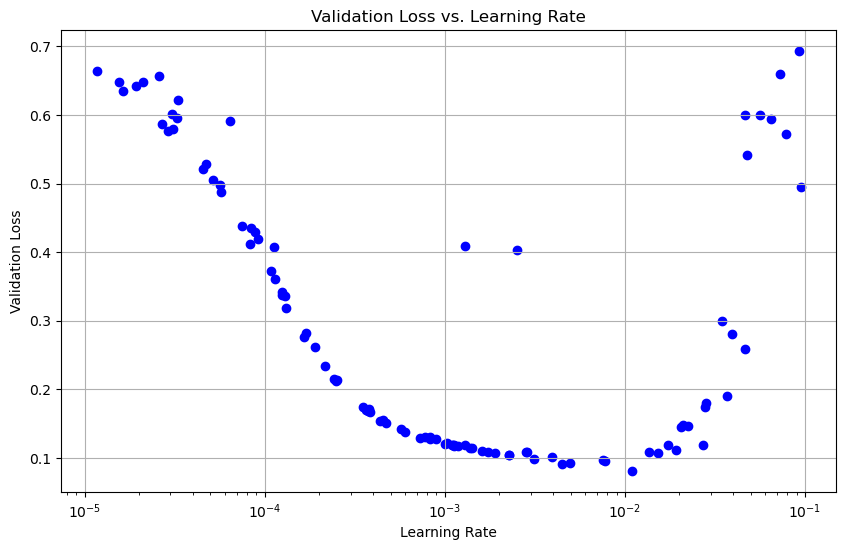

In [19]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(learning_rates, val_losses, color='blue')
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs. Learning Rate')
plt.grid(True)
plt.show()

## Training NN model with the best learning rate

Epoch 1: Train Loss = 0.1888, Validation Loss = 0.1531
Epoch 2: Train Loss = 0.1146, Validation Loss = 0.1122
Epoch 3: Train Loss = 0.1070, Validation Loss = 0.1229
Epoch 4: Train Loss = 0.0829, Validation Loss = 0.1108
Epoch 5: Train Loss = 0.0687, Validation Loss = 0.0871
Epoch 6: Train Loss = 0.0603, Validation Loss = 0.0827
Epoch 7: Train Loss = 0.0536, Validation Loss = 0.0882
Epoch 8: Train Loss = 0.0506, Validation Loss = 0.0973
Epoch 9: Train Loss = 0.0476, Validation Loss = 0.0817
Epoch 10: Train Loss = 0.0417, Validation Loss = 0.1094
Model saved successfully to 'model.pth'


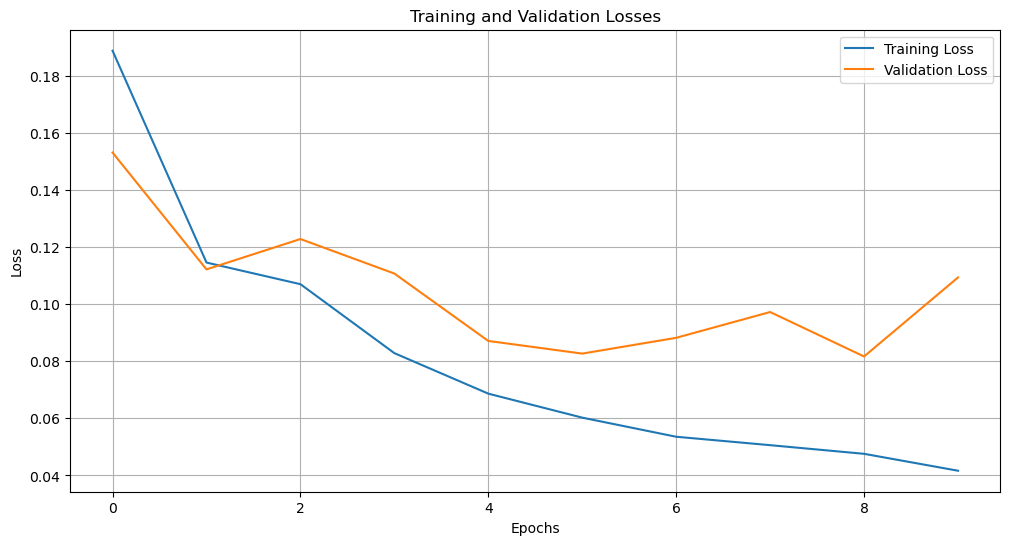

In [20]:
num_epochs = 10
best_lr = 0.01
model = NeuralNet(input_size, hidden_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=best_lr)

# Lists to track loss
train_losses = []
val_losses = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

    avg_val_loss = total_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    print(f'Epoch {epoch+1}: Train Loss = {avg_train_loss:.4f}, Validation Loss = {avg_val_loss:.4f}')

torch.save(model.state_dict(), 'model.pth')

# You can print this statement to confirm saving
print("Model saved successfully to 'model.pth'")

# Plotting training and validation losses
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# Put model in evaluation mode
model.eval()
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        
        # Get the predictions
        _, predicted = torch.max(outputs.data, 1)
        
        # Append batch prediction results
        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Calculate precision, recall, f1-score, and accuracy
precision = precision_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')
f1 = f1_score(true_labels, predicted_labels, average='macro')
accuracy = accuracy_score(true_labels, predicted_labels)

print("Evaluation results:")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:\n")
print(classification_report(true_labels, predicted_labels, target_names=['Class0', 'Class1']))  # Adjust class names as necessary


Evaluation results:
Precision: 0.9563, Recall: 0.9574, F1 Score: 0.9565, Accuracy: 0.9565

Classification Report:

              precision    recall  f1-score   support

      Class0       0.94      0.97      0.96       949
      Class1       0.98      0.94      0.96      1051

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



#### Testing with an unseen URL

In [23]:
def predict_url_class(url, model):
    # Compute features from the URL
    features = compute_features(url, feature_list)  
    features_df = pd.DataFrame([features])
    
    # using PyTorch, convert DataFrame to tensor
    inputs = torch.tensor(features_df.values.astype(np.float32))
    inputs = inputs.to(device)
    with torch.no_grad():
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
    return predicted.item()

In [24]:
url = "http://192.18.18.233/"

nn_model = NeuralNet(input_size, hidden_size, num_classes).to(device)
nn_model.load_state_dict(torch.load('model.pth'))
nn_model.eval()  
predicted_class = predict_url_class(url, nn_model)
print("Predicted class:", "bad" if predicted_class == 1 else "good")

{'NumDots': 3, 'SubdomainLevel': 0, 'PathLevel': 0, 'UrlLength': 21, 'NumDash': 0, 'NumDashInHostname': 0, 'AtSymbol': 0, 'TildeSymbol': 0, 'NumUnderscore': 0, 'NumPercent': 0, 'NumQueryComponents': 0, 'NumAmpersand': 0, 'NumHash': 0, 'NumNumericChars': 10, 'NoHttps': 1, 'RandomString': 1, 'IpAddress': 1, 'DomainInSubdomains': 0, 'DomainInPaths': 0, 'HttpsInHostname': 0, 'HostnameLength': 13, 'PathLength': 1, 'QueryLength': 0, 'DoubleSlashInPath': 0, 'NumSensitiveWords': 0, 'EmbeddedBrandName': 0, 'PctExtHyperlinks': 0, 'PctExtResourceUrls': 0, 'ExtFavicon': 0, 'InsecureForms': 0, 'RelativeFormAction': 0, 'ExtFormAction': 0, 'AbnormalFormAction': 0, 'PctNullSelfRedirectHyperlinks': 0, 'FrequentDomainNameMismatch': 0, 'FakeLinkInStatusBar': 0, 'RightClickDisabled': 0, 'PopUpWindow': 0, 'SubmitInfoToEmail': 0, 'IframeOrFrame': 0, 'MissingTitle': 0, 'ImagesOnlyInForm': 0, 'SubdomainLevelRT': 3, 'UrlLengthRT': 21, 'PctExtResourceUrlsRT': 0, 'AbnormalExtFormActionR': 0, 'ExtMetaScriptLinkRT